<a href="https://colab.research.google.com/github/BoshiLee/pytorch_learning/blob/main/Deep_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip3 install torch

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets 

## 建立資料集

sklearn.datasets.make_circles(n_samples=100, shuffle=True, noise=None, random_state=None, factor=0.8)  

生成环形数据
factor參數：兩個圈的距離 Scale factor between inner and outer circle in the range (0, 1)

In [3]:
n_pts = 500
X, y = datasets.make_circles(n_samples=n_pts, random_state=123, noise=0.1, factor=0.2)
x_data = torch.Tensor(X)
y_data = torch.Tensor(y.reshape(500, 1))

In [4]:
def scatter_plot():
  plt.scatter(X[y==0, 0], X[y==0, 1])
  plt.scatter(X[y==1, 0], X[y==1, 1])

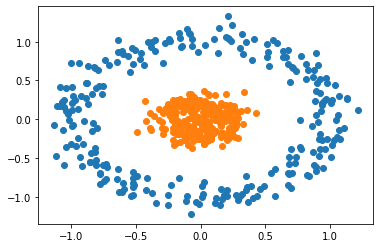

In [5]:
scatter_plot()

## Perceptorn
定義一個感知器，可以分類橘色和藍色的群組, 但這次會加上另一層 hidden layer H1

In [6]:
class Model(nn.Module):
  def __init__(self, input_size, H1, output_size): #輸入, hidden layer 節點, 輸出節點
    super().__init__()
    self.linear = nn.Linear(input_size, H1)
    self.linear2 = nn.Linear(H1, output_size)
  def forward(self, x):
    x = torch.sigmoid(self.linear(x))
    x = torch.sigmoid(self.linear2(x))
    return x
  def predict(self, x):
    pred = self.forward(x)
    if pred >= 0.5:
      return 1
    else:
      return 0

In [7]:
torch.manual_seed(2)
model = Model(2, 4, 1)
print(list(model.parameters()))

[Parameter containing:
tensor([[ 0.1622, -0.1683],
        [ 0.1939, -0.0361],
        [ 0.3021,  0.1683],
        [-0.0813, -0.5717]], requires_grad=True), Parameter containing:
tensor([ 0.1614, -0.6260,  0.0929,  0.0470], requires_grad=True), Parameter containing:
tensor([[-0.1099,  0.4088,  0.0334,  0.2073]], requires_grad=True), Parameter containing:
tensor([0.2116], requires_grad=True)]


## Traing

In [8]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.01) #使用梯度下降法更新 model 參數


In [9]:
epochs = 1000
losses = []
for i in range(epochs):
  y_pred = model.forward(x_data)
  loss = criterion(y_pred, y_data)
  print("epoch:", i, "loss", loss.item())
  losses.append(loss.item())
  optimizer.zero_grad()
  loss.backward()
  optimizer.step()

epoch: 0 loss 0.7148520350456238
epoch: 1 loss 0.7117707133293152
epoch: 2 loss 0.7089375257492065
epoch: 3 loss 0.7063546180725098
epoch: 4 loss 0.7040227055549622
epoch: 5 loss 0.7019400596618652
epoch: 6 loss 0.7001037001609802
epoch: 7 loss 0.6985084414482117
epoch: 8 loss 0.6971474885940552
epoch: 9 loss 0.6960120797157288
epoch: 10 loss 0.6950911283493042
epoch: 11 loss 0.6943708658218384
epoch: 12 loss 0.6938351988792419
epoch: 13 loss 0.6934651136398315
epoch: 14 loss 0.6932395100593567
epoch: 15 loss 0.6931353807449341
epoch: 16 loss 0.6931286454200745
epoch: 17 loss 0.6931947469711304
epoch: 18 loss 0.6933096647262573
epoch: 19 loss 0.6934511661529541
epoch: 20 loss 0.6935994625091553
epoch: 21 loss 0.6937383413314819
epoch: 22 loss 0.6938555240631104
epoch: 23 loss 0.6939425468444824
epoch: 24 loss 0.6939951181411743
epoch: 25 loss 0.6940121650695801
epoch: 26 loss 0.6939955949783325
epoch: 27 loss 0.6939494013786316
epoch: 28 loss 0.6938791275024414
epoch: 29 loss 0.6937912

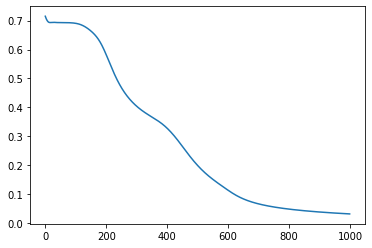

In [10]:
plt.plot(range(epochs), losses)
plt.xlabel = "epoch"
plt.ylabel = "loss"
plt.show()

[Adam Optimizer 解釋](https://medium.com/%E9%9B%9E%E9%9B%9E%E8%88%87%E5%85%94%E5%85%94%E7%9A%84%E5%B7%A5%E7%A8%8B%E4%B8%96%E7%95%8C/%E6%A9%9F%E5%99%A8%E5%AD%B8%E7%BF%92ml-note-sgd-momentum-adagrad-adam-optimizer-f20568c968db)

語法解釋：

X[:, 0] => X 第 0 軸的所有元素且在每一個元素取得第 1軸的第 0 個元素

X[第0軸, 第1軸,,, 第n軸]

meshgrid 說明：

```
xvalues = np.array([1, 2, 3, 4])
yvalues = np.array([7, 6, 5])

xx, yy = np.meshgrid(xvalues, yvalues)

print('xx=', xx)
print('yy=', yy)

```
印出橫向與縱向的矩陣
```
xx= [[1 2 3 4]
     [1 2 3 4]
     [1 2 3 4]]
yy= [[7 7 7 7]
     [6 6 6 6]
     [5 5 5 5]]
```
np.c_是按行连接两个矩阵，就是把两矩阵左右相加，要求行数相等。




In [11]:
np.c_[np.array([1,2,3]), np.array([4,5,6])]

array([[1, 4],
       [2, 5],
       [3, 6]])

In [12]:
def plot_decision_boundary(X, y):
  x_span = np.linspace(min(X[:, 0]) -0.25, max(X[:, 0])+0.25) # 從 DataSet X 取得水平軸的最小與最大值產生等距的陣列，預設為 50 格
  y_span = np.linspace(min(X[:, 1]) -0.25, max(X[:, 1])+0.25) # 從 DataSet X 取得垂直軸的最小與最大值產生等距的陣列，預設為 50 格
  xx, yy = np.meshgrid(x_span, y_span)
  grid = torch.Tensor(np.c_[xx.ravel(), yy.ravel()]) #將二維陣列轉換成一為的陣列在左右相加，目的是讓 grid 可以當 model 的輸入 
  pred_func = model.forward(grid)
  z = pred_func.view(xx.shape).detach().numpy() # 將預測後的數字先轉成 50*50 的矩陣後，再轉乘 numpy 陣列後才可將其繪製出
  plt.contourf(xx, yy, z) # 匯出預測結果的輪廓

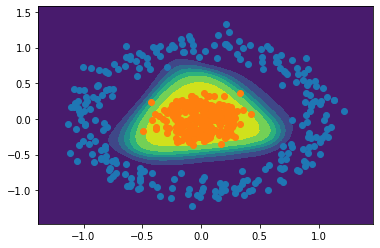

In [13]:
plot_decision_boundary(X, y)
scatter_plot()

Prediction is 1


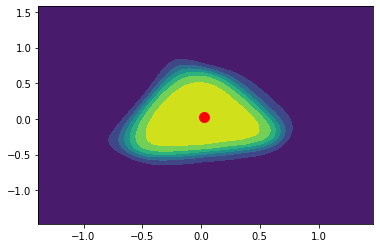

In [14]:
x = 0.025
y = 0.025
point = torch.Tensor([x, y])
prediction = model.predict(point)
plt.plot([x], [y], marker='o', markersize=10, color="red")
print("Prediction is", prediction)
plot_decision_boundary(X, y)